In [1]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping

In [2]:
(x_train,y_train),(x_test,y_test) = keras.datasets.cifar100.load_data()

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
image_size = x_train.shape
image_size

(50000, 32, 32, 3)

In [4]:
import numpy as np
numberofclasses = len(np.unique(y_train))
numberofclasses

100

In [5]:
# simple CNN
model = Sequential()
# Feature extraction
model.add(Conv2D(32,(3,3),input_shape = (32,32,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# classification
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(100, activation='softmax')) # use the number of class here

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])


In [7]:
callbacks = [EarlyStopping(monitor='val_loss' , patience = 15)]

In [8]:
history = model.fit(x_train,y_train, callbacks = callbacks, validation_split = 0.1, batch_size = 16, epochs = 1000)

Epoch 1/1000
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.0093 - loss: 6.0298 - val_accuracy: 0.0086 - val_loss: 4.6064
Epoch 2/1000
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.0093 - loss: 4.6204 - val_accuracy: 0.0094 - val_loss: 4.6077
Epoch 3/1000
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.0095 - loss: 4.6056 - val_accuracy: 0.0078 - val_loss: 4.6079
Epoch 4/1000
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.0100 - loss: 4.6064 - val_accuracy: 0.0078 - val_loss: 4.6080
Epoch 5/1000
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.0105 - loss: 4.6057 - val_accuracy: 0.0070 - val_loss: 4.6078
Epoch 6/1000
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.0096 - loss: 4.6058 - val_accuracy: 0.0078 - val_loss: 4.6079
Epoch 7/1000
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.0100 - loss: 4.6056 - val_accuracy: 0.0070 - val_loss: 4.6079
Epoch 8/1000
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.0

In [9]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0104 - loss: 4.6052


[4.605310440063477, 0.009999999776482582]

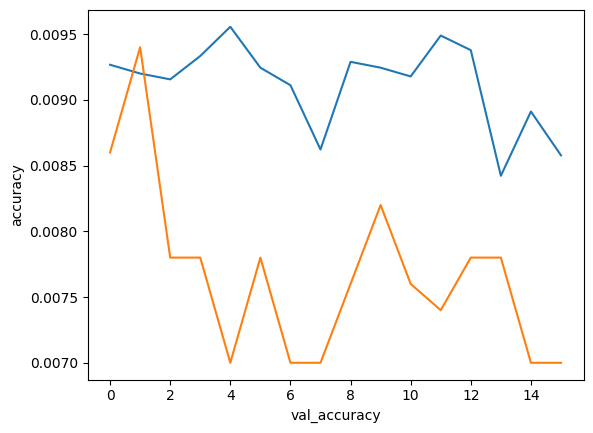

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('val_accuracy')
plt.show()

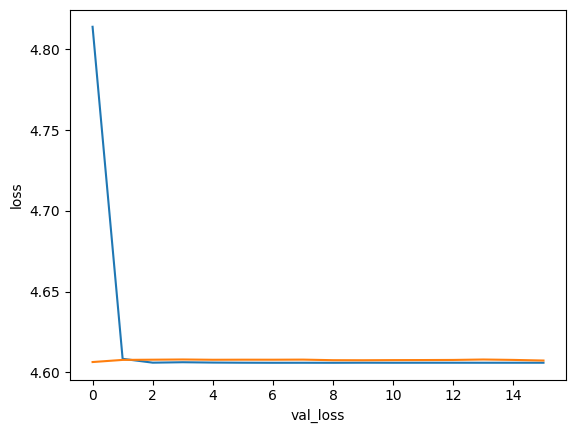

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('val_loss')
plt.show()